In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Model
from keras.layers import Dense, Flatten
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.applications.vgg16 import VGG16
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os 

2023-05-18 23:17:56.512959: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-18 23:17:57.621027: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
num_classes = 5
batch_size = 8
num_epochs = 2
image_size = (224,224)
# ADD DATASET FROM DIRECTORY

data_dir = r"/mnt/c/Windows/System32/repos/thesis_raw_data/Doc_H-Data"

train_ds = tf.keras.utils.image_dataset_from_directory(
  directory = data_dir,
  labels='inferred',
  label_mode='categorical',
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size= image_size,
  batch_size= batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
  directory = data_dir,
  labels='inferred',
  label_mode='categorical',
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size= image_size,
  batch_size= batch_size)

train_dataset = val_ds.take(5)
val_ds = val_ds.skip(5)

print('Batches for testing -->', train_ds.cardinality())
print('Batches for validating -->', val_ds.cardinality())


Found 390 files belonging to 5 classes.
Using 312 files for training.


2023-05-18 23:18:03.385426: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-05-18 23:18:03.537939: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-05-18 23:18:03.538001: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-05-18 23:18:03.542580: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-05-18 23:18:03.542657: I tensorflow/compile

Found 390 files belonging to 5 classes.
Using 78 files for validation.
Batches for testing --> tf.Tensor(39, shape=(), dtype=int64)
Batches for validating --> tf.Tensor(5, shape=(), dtype=int64)


In [3]:
# train_ds_ub = train_ds.unbatch()
# images = list(train_ds_ub.map(lambda x, y: x))
# labels = list(train_ds_ub.map(lambda x, y: y))

# print(labels)

y = np.concatenate([y for x, y in train_ds], axis=0)
print(y)

2023-05-18 23:18:33.217721: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [312]
	 [[{{node Placeholder/_4}}]]
2023-05-18 23:18:33.218005: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [312]
	 [[{{node Placeholder/_0}}]]


[[0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 ...
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]]


In [4]:
vgg16_model = VGG16(include_top = False,
            weights = 'imagenet', 
            input_tensor = None, 
            input_shape = (224,224,3), #shape of npy file data
            pooling = None,
            classes = 1000,
            classifier_activation="softmax") 


# Do not retrain convolutional layers
for layer in vgg16_model.layers:
    layer.trainable = False

input_shape = keras.Input(shape=(224, 224, 3))

# Add new fully connected layers
x = Flatten()(vgg16_model.output)
x = Dense(2048, activation='relu')(x)
x = Dense(1024, activation='relu')(x)
output = Dense(num_classes, activation='softmax')(x)  # num_classes is the number of classes in your dataset

# Create a new model with the fully connected layers added
model = Model(inputs=vgg16_model.input, outputs=output)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [5]:
# Use the generators to train the model
history = model.fit(train_ds,
          validation_data = val_ds,
          epochs=num_epochs,
          )
        #   steps_per_epoch= len(train_generator) // batch_size,
        #   validation_data=test_generator)


Epoch 1/2


2023-05-18 23:19:13.469837: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8600
2023-05-18 23:19:15.585645: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:637] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-05-18 23:19:15.593273: I tensorflow/compiler/xla/service/service.cc:169] XLA service 0x35105c60 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-05-18 23:19:15.593321: I tensorflow/compiler/xla/service/service.cc:177]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Laptop GPU, Compute Capability 8.6
2023-05-18 23:19:15.602239: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-05-18 23:19:15.733554: I ./tensorflow/compiler/jit/device_compiler.h:180] Compiled cluster using XLA!  This line is logged at most once for the lifetime o

39/39 [==============================] - ETA: 0s - loss: 42.0749 - accuracy: 0.4263

2023-05-18 23:19:19.404755: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [78]
	 [[{{node Placeholder/_0}}]]
2023-05-18 23:19:19.405117: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [78]
	 [[{{node Placeholder/_4}}]]


39/39 [==============================] - 11s 127ms/step - loss: 42.0749 - accuracy: 0.4263 - val_loss: 6.4799 - val_accuracy: 0.4474
Epoch 2/2
39/39 [==============================] - 6s 131ms/step - loss: 4.9244 - accuracy: 0.8237 - val_loss: 11.6590 - val_accuracy: 0.5526


[0.44736841320991516, 0.5526315569877625]


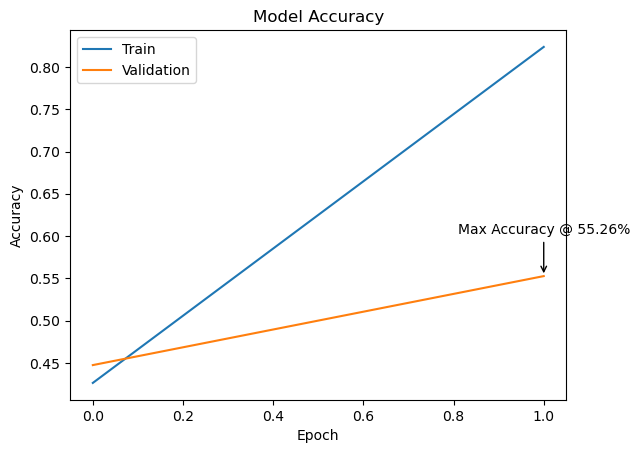

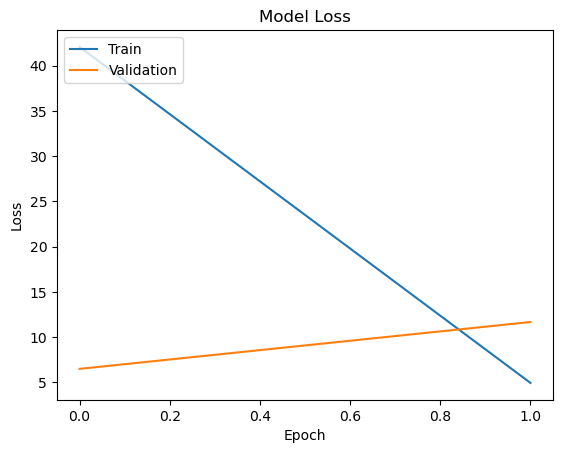

In [6]:

# Save the trained model
model.save('vgg16_trained.h5')

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

print(history.history['val_accuracy'])
#Find the x and y position of the highest test accuracy
#list all val_accuracy values
list = history.history['val_accuracy']

#find highest val_accuracy
ymax =  max(history.history['val_accuracy'])

#find index of highest val_accuracy
xpos = list.index(max(history.history['val_accuracy']))

# Annotation for max accuracy
plt.annotate('Max Accuracy @ {}%'.format(round(ymax*100,2)), xy=(xpos, ymax), xytext=(xpos, ymax+.05), ha = 'center', 
             arrowprops=dict(arrowstyle="->", facecolor='black'))
#Show plot             
plt.show()
# Plot the training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

[0.42105263471603394]


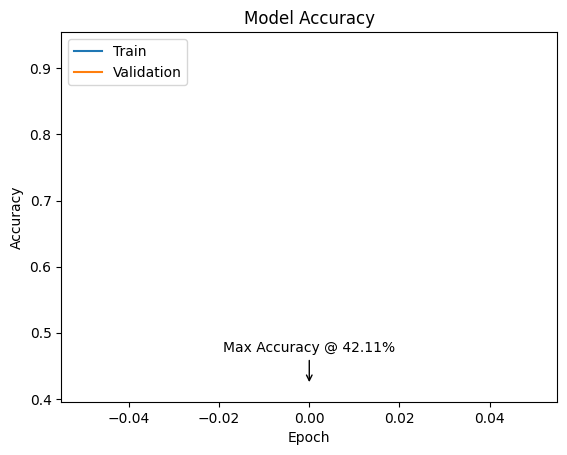

In [46]:
# Plot the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

print(history.history['val_accuracy'])
#Find the x and y position of the highest test accuracy
#list all val_accuracy values
list = history.history['val_accuracy']

#find highest val_accuracy
ymax =  max(history.history['val_accuracy'])

#find index of highest val_accuracy
xpos = list.index(max(history.history['val_accuracy']))

# Annotation for max accuracy
plt.annotate('Max Accuracy @ {}%'.format(round(ymax*100,2)), xy=(xpos, ymax), xytext=(xpos, ymax+.05), ha = 'center', 
             arrowprops=dict(arrowstyle="->", facecolor='black'))
#Show plot             
plt.show()

https://stackoverflow.com/questions/54589669/confusion-matrix-error-classification-metrics-cant-handle-a-mix-of-multilabel\
for below

In [21]:
predicted_batch = model.predict(val_ds)
predicted_id= np.argmax(predicted_batch, axis=-1)

print(predicted_id)

true_id = tf.concat([y for x, y in val_ds], axis=0)
true_id=np.argmax(true_id, axis=1)
true_id[1]
print(true_id)


5/5 [==============================] - 2s 106ms/step
[0 0 3 0 0 0 0 0 0 0 1 3 3 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 3 0 3 0 0 0
 0]
[0 0 0 4 0 0 0 3 0 0 3 3 3 0 0 0 0 0 1 3 0 2 0 1 0 4 2 4 0 0 0 0 2 0 0 1 4
 4]


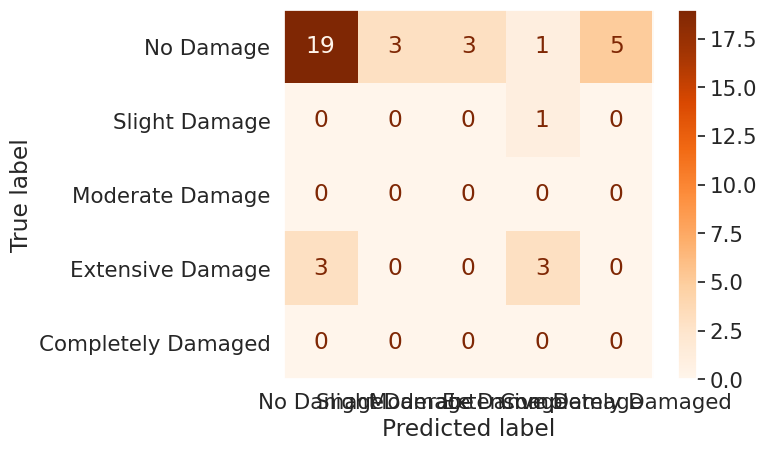

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(predicted_id, true_id)
labels = ["No Damage", "Slight Damage", "Moderate Damage", "Extensive Damage", "Completely Damaged"]
disp = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=labels)
disp.plot(cmap=plt.cm.Oranges)
plt.grid(None)
plt.show()


In [ ]:
# Plot the training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn import confusion_matrix
# true_categories = tf.concat([y for x, y in val_ds], axis=0)

# cm = confusion_matrix(true_categories, predicted_id)
# fig = plt.figure(figsize = (8,8))
# ax1 = fig.add_subplot(1,1,1)
# sns.set(font_scale=1.4) #for label size
# sns.heatmap(cm, annot=True, annot_kws={"size": 12},
#      cbar = False, cmap='Purples');
# ax1.set_ylabel('True Values',fontsize=14)
# ax1.set_xlabel('Predicted Values',fontsize=14)
# plt.show()

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

val_ds = np.argmax(val_ds, axis = -1)


predictions = model.predict(train_ds)

predictions = np.argmax(predictions)

print(val_ds)
print(predictions)
# matrix = confusion_matrix(val_ds, predictions)
# labels = ["Non-collapse", "Partial Collapse", "Global Collapse"]
# disp = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=labels)

# disp.plot(cmap=plt.cm.Oranges)
# plt.show()